In [1]:
import numpy as np
import pandas

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

In [2]:
# Названия признаков

column_names = ['Sort','Alcohol','Malic acid','Ash','Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [4]:
data = pandas.read_csv('wine.data', header=None, names=column_names);

# Выделение ответов и матрицы объекты-признаки
answers = data['Sort']
features = data.drop(columns='Sort')

# Нормировка матрицы объекты-признаки
features = scale(features)

In [5]:
# Создание генератора разбиений для проверки качества кросс-валидацией на пяти блоках

folding = KFold(n_splits=5, shuffle=True, random_state=41)

In [6]:
metrics_errors = {'euclidean':[], 'manhattan':[], 'chebyshev':[]}

for metric_ in metrics_errors.keys():

    for k_neighbors in range(1,120):
        # Создание классификатора и его обучение для различныз метрик
        clf = KNeighborsClassifier(n_neighbors=k_neighbors, metric=metric_)
        clf.fit(features, answers)
        
        # Оценка точности классификатора кросс-валидацией
        accuracy = cross_val_score(clf, features, answers, scoring='accuracy', cv=folding)
        accuracy = accuracy.mean()
        
        metrics_errors[metric_].append(1 - accuracy)
    
    
    # Вывод результата работы алгоритма
    min_error = min(metrics_errors[metric_])
    min_neighbor = metrics_errors[metric_].index(min_error)
    print('Minimal error for', metric_, 'metric is', '%.3f' % min_error, 'with', min_neighbor, 'neigbors')


Minimal error for euclidean metric is 0.023 with 26 neigbors
Minimal error for manhattan metric is 0.028 with 30 neigbors
Minimal error for chebyshev metric is 0.045 with 18 neigbors


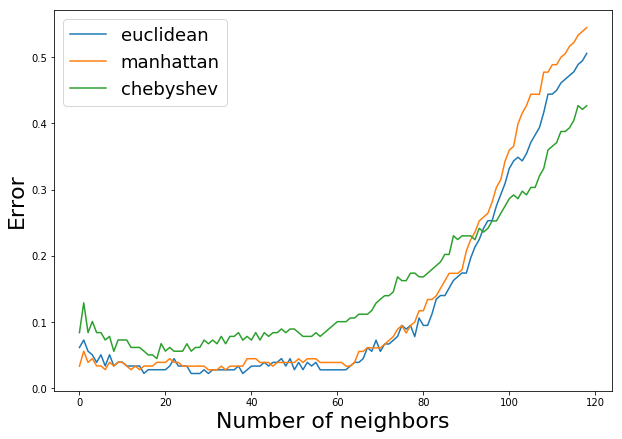

In [7]:
plt.figure(figsize=(10,7))
plt.xlabel('Number of neighbors', fontsize=22)
plt.ylabel('Error', fontsize=22)

for metric_ in metrics_errors.keys():
    plt.plot(metrics_errors[metric_], label=metric_)
    
plt.legend(fontsize=18)    
    